# Introducci√≥n

Kaggle describe esta competici√≥n de la siguiente manera:

Millones de animales callejeros sufren en las calles o son sacrificados en refugios cada d√≠a en todo el mundo. Si se les encuentra un hogar, se salvar√°n muchas vidas preciosas y se crear√°n m√°s familias felices.

PetFinder.my es la principal plataforma de bienestar animal de Malasia desde 2008, con una base de datos de m√°s de 150.000 animales. PetFinder colabora estrechamente con amantes de los animales, medios de comunicaci√≥n, empresas y organizaciones mundiales para mejorar el bienestar animal.

En este concurso se desarrollar√°n algoritmos para predecir la adoptabilidad de las mascotas, en concreto, con qu√© rapidez se adopta una mascota. 


# The target variable: Adoption Speed¬∂
Los concursantes deben predecir este valor. El valor viene determinado por la rapidez con la que se adopta una mascota, si es que se adopta. Los valores se determinan de la siguiente manera:

        - **0** - La mascota fue adoptada el mismo d√≠a que se incluy√≥ en la lista.
        - **1** - La mascota fue adoptada entre 1 y 7 d√≠as (1¬™ semana) despu√©s de ser incluida en la lista.
        - **2** - La mascota fue adoptada entre 8 y 30 d√≠as (1er mes) despu√©s de ser incluida en la lista.
        - **3** - La mascota fue adoptada entre 31 y 90 d√≠as (2¬∫ y 3er mes) despu√©s de su inclusi√≥n en la lista.
        - **4** - Ninguna adopci√≥n despu√©s de 100 d√≠as de estar en la lista.

# Variables
| Variable        | Descripci√≥n                                                                 |
|----------------|------------------------------------------------------------------------------|
| PetID          | Identificador √∫nico encriptado del perfil de la mascota.                    |
| AdoptionSpeed  | Velocidad categ√≥rica de adopci√≥n. Cuanto menor es el n√∫mero, m√°s r√°pida fue la adopci√≥n. Este es el valor que se debe predecir. |
| Type           | Tipo de animal (1 = Perro, 2 = Gato).                                       |
| Name           | Nombre de la mascota (vac√≠o si no tiene nombre).                            |
| Age            | Edad de la mascota al momento de ser listada, en meses.                     |
| Breed1         | Raza principal de la mascota (consultar el diccionario de etiquetas de razas). |
| Breed2         | Raza secundaria, si la mascota es mestiza (consultar el diccionario de etiquetas de razas). |
| Gender         | Sexo de la mascota (1 = Macho, 2 = Hembra, 3 = Mixto, si el perfil representa un grupo de mascotas). |
| Color1         | Primer color de la mascota (consultar el diccionario de etiquetas de colores). |
| Color2         | Segundo color de la mascota (consultar el diccionario de etiquetas de colores). |
| Color3         | Tercer color de la mascota (consultar el diccionario de etiquetas de colores). |
| MaturitySize   | Tama√±o de la mascota cuando alcance la madurez (1 = Peque√±o, 2 = Mediano, 3 = Grande, 4 = Extra grande, 0 = No especificado). |
| FurLength      | Longitud del pelaje (1 = Corto, 2 = Medio, 3 = Largo, 0 = No especificado). |
| Vaccinated     | Indica si la mascota ha sido vacunada (1 = S√≠, 2 = No, 3 = No est√° claro).  |
| Dewormed       | Indica si la mascota ha sido desparasitada (1 = S√≠, 2 = No, 3 = No est√° claro). |
| Sterilized     | Indica si la mascota ha sido esterilizada o castrada (1 = S√≠, 2 = No, 3 = No est√° claro). |
| Health         | Estado de salud (1 = Saludable, 2 = Lesi√≥n menor, 3 = Lesi√≥n grave, 0 = No especificado). |
| Quantity       | N√∫mero de mascotas representadas en el perfil.                              |
| Fee            | Tarifa de adopci√≥n (0 = Gratuita).                                          |
| State          | Estado (provincia) de ubicaci√≥n en Malasia (consultar el diccionario de etiquetas de estados). |
| RescuerID      | Identificador √∫nico encriptado de la persona rescatista.                    |
| VideoAmt       | Cantidad total de videos subidos para esta mascota.                         |
| PhotoAmt       | Cantidad total de fotos subidas para esta mascota.                          |
| Description    | Descripci√≥n del perfil de la mascota. El idioma principal es ingl√©s, aunque tambi√©n puede haber partes en malayo o chino. |


# Ingesta de Datos

In [265]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import lightgbm as lgb
import xgboost as xgb
from wordcloud import WordCloud

In [266]:
print(os.listdir("./input/petfinder-adoption-prediction"))

['test_images', 'breed_labels.csv', '.DS_Store', 'test', 'train_metadata', 'color_labels.csv', 'test_sentiment', 'test_metadata', 'StateLabels.csv', 'ColorLabels.csv', 'PetFinder-BreedLabels.csv', 'train_sentiment', 'train', 'BreedLabels.csv', 'PetFinder-ColorLabels.csv', 'train_images', 'PetFinder-StateLabels.csv', 'state_labels.csv']


In [267]:
train_dtypes = {
        'PetID':                            'str',
        'AdoptionSpeed ':                   'int8',
        'Type':                             'int',
        'Name':                             'str',
        'Age':                              'int8',
        'Breed1':                           'category',
        'Breed2':                           'category',
        'Gender':                           'category',
        'Color1':                           'category',
        'Color2':                           'category',
        'Color3':                           'category',
        'MaturitySize':                     'float16',
        'FurLength':                        'int8',
        'Vaccinated':                       'category',
        'Dewormed':                         'category',
        'Sterilized':                       'category',
        'Health':                           'category',
        'Quantity':                         'uint16',
        'State':                            'category',
        'Fee':                              'float',
        'RescuerID':                        'category',
        'VideoAmt':                         'uint16',
        'PhotoAmt':                         'uint16',
        'Description ':                     'str'
        }

breeds_dtypes = {
        'BreedID':                          'category',
        'Type ':                            'category',
        'BreedName':                        'str'
        }

colors_dtypes = {
        'ColorID':                          'category',
        'ColorName':                        'str'
        }

states_dtypes = {
        'StateID':                          'category',
        'StateName':                        'str'
        }

In [268]:
main_path = './input/petfinder-adoption-prediction/'

In [269]:
breeds = pd.read_csv(f'{main_path}breed_labels.csv', dtype=breeds_dtypes)
colors = pd.read_csv(f'{main_path}color_labels.csv',  dtype=colors_dtypes)
states = pd.read_csv('./input/petfinder-adoption-prediction/state_labels.csv', dtype=states_dtypes)

train = pd.read_csv(f'{main_path}train/train.csv', dtype=train_dtypes)

df = train.copy()

# Exploracion del Dataset

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Type           14993 non-null  int64   
 1   Name           13728 non-null  object  
 2   Age            14993 non-null  int8    
 3   Breed1         14993 non-null  category
 4   Breed2         14993 non-null  category
 5   Gender         14993 non-null  category
 6   Color1         14993 non-null  category
 7   Color2         14993 non-null  category
 8   Color3         14993 non-null  category
 9   MaturitySize   14993 non-null  float16 
 10  FurLength      14993 non-null  int8    
 11  Vaccinated     14993 non-null  category
 12  Dewormed       14993 non-null  category
 13  Sterilized     14993 non-null  category
 14  Health         14993 non-null  category
 15  Quantity       14993 non-null  uint16  
 16  Fee            14993 non-null  float64 
 17  State          14993 non-null  

In [271]:
df.sample(10).T

10360  \
Type                                                           1   
Name                                                      Norman   
Age                                                           30   
Breed1                                                       195   
Breed2                                                       179   
Gender                                                         1   
Color1                                                         1   
Color2                                                         0   
Color3                                                         0   
MaturitySize                                                 1.0   
FurLength                                                      1   
Vaccinated                                                     1   
Dewormed                                                       1   
Sterilized                                                     1   
Health                                                         1   
Quantity                                                       1   
Fee                                                          0.0   
State                                                      41326   
RescuerID                       34e0334bce2be490bbd4aeec5c421686   
VideoAmt                                                       0   
Description    This is Norman. We recently took him home from...   
PetID                                                  da5d1c5ba   
PhotoAmt                                                       3   
AdoptionSpeed                                                  1   

                                                           14336  \
Type                                                           1   
Name                                                      Prince   
Age                                                            6   
Breed1                                                       307   
Breed2                                                         0   
Gender                                                         1   
Color1                                                         1   
Color2                                                         0   
Color3                                                         0   
MaturitySize                                                 2.0   
FurLength                                                      1   
Vaccinated                                                     1   
Dewormed                                                       1   
Sterilized                                                     2   
Health                                                         1   
Quantity                                                       1   
Fee                                                          0.0   
State                                                      41326   
RescuerID                       db2352f4bd012f1ff04dcfbee81f8468   
VideoAmt                                                       0   
Description    Prince is a lovable dog, who was abandoned by ...   
PetID                                                  0eb219818   
PhotoAmt                                                       2   
AdoptionSpeed                                                  4   

                                                           14043  \
Type                                                           2   
Name                                                      Russia   
Age                                                           96   
Breed1                                                       289   
Breed2                                                         0   
Gender                                                         2   
Color1                                                         6   
Color2                                                         0   
Color3                                       

In [272]:
df.shape

(14993, 24)

In [273]:
# Diccionarios de mapeo basados en tu descripci√≥n
map_type = {1: 'Perros', 2: 'Gatos'}
map_gender = {1: 'Macho', 2: 'Hembra', 3: 'Mixto'}
map_maturity = {1: 'Peque√±o', 2: 'Mediano', 3: 'Grande', 4: 'Extra grande', 0: 'No especificado'}
map_furlength = {1: 'Corto', 2: 'Medio', 3: 'Largo', 0: 'No especificado'}
map_vaccinated = {1: 'S√≠', 2: 'No', 3: 'No claro'}
map_dewormed = {1: 'S√≠', 2: 'No', 3: 'No claro'}
map_sterilized = {1: 'S√≠', 2: 'No', 3: 'No claro'}
map_health = {1: 'Saludable', 2: 'Lesi√≥n menor', 3: 'Lesi√≥n grave', 0: 'No especificado'}
adoption_order = [
    "mismo d√≠a",
    "1-7 d√≠as",
    "8-30 d√≠as",
    "31-90 d√≠as",
    "(90+ d√≠as)"
]


In [274]:
from pandas.api.types import CategoricalDtype

In [275]:
# Tipo categ√≥rico ordenado para AdoptionSpeed
adoption_cat_type = CategoricalDtype(categories=adoption_order, ordered=True)

In [276]:
# Copiamos el DataFrame original
df_expl = df.copy()

In [277]:
# Aplicamos los mapeos a las columnas codificadas
df_expl['Type'] = df_expl['Type'].astype('int').map(map_type)
df_expl['Gender'] = df_expl['Gender'].astype('int').map(map_gender)
df_expl['MaturitySize'] = df_expl['MaturitySize'].astype('int').map(map_maturity)
df_expl['FurLength'] = df_expl['FurLength'].astype('int').map(map_furlength)
df_expl['Vaccinated'] = df_expl['Vaccinated'].astype('int').map(map_vaccinated)
df_expl['Dewormed'] = df_expl['Dewormed'].astype('int').map(map_dewormed)
df_expl['Sterilized'] = df_expl['Sterilized'].astype('int').map(map_sterilized)
df_expl['Health'] = df_expl['Health'].astype('int').map(map_health)
#df_expl['AdoptionSpeed'] = df_expl['AdoptionSpeed'].astype('int').map(map_adoption_speed)
# üîÅ Map + tipo categ√≥rico ordenado
df_expl['AdoptionSpeed'] = df_expl['AdoptionSpeed'].astype('int').map(map_adoption_speed)
df_expl['AdoptionSpeed'] = df_expl['AdoptionSpeed'].astype(adoption_cat_type)

In [278]:
df_expl.sample(10).T

3769   \
Type                                     Perros   
Name                                         T1   
Age                                           2   
Breed1                                      307   
Breed2                                      307   
Gender                                    Macho   
Color1                                        5   
Color2                                        0   
Color3                                        0   
MaturitySize                            Mediano   
FurLength                                 Medio   
Vaccinated                                   S√≠   
Dewormed                                     S√≠   
Sterilized                                   No   
Health                                Saludable   
Quantity                                      1   
Fee                                         0.0   
State                                     41326   
RescuerID      b53c34474d9e24574bcec6a3d3306a0d   
VideoAmt                                      0   
Description                        For Adoption   
PetID                                 50d1c2157   
PhotoAmt                                      1   
AdoptionSpeed                         8-30 d√≠as   

                                                           2586   \
Type                                                       Gatos   
Name                                                        Apam   
Age                                                           12   
Breed1                                                       265   
Breed2                                                         0   
Gender                                                     Macho   
Color1                                                         2   
Color2                                                         7   
Color3                                                         0   
MaturitySize                                              Grande   
FurLength                                                  Medio   
Vaccinated                                                    S√≠   
Dewormed                                                      S√≠   
Sterilized                                                    No   
Health                                                 Saludable   
Quantity                                                       2   
Fee                                                          0.0   
State                                                      41326   
RescuerID                       55f43a91bf4b1564272b2bba7de74273   
VideoAmt                                                       0   
Description    I have to let him go but only to trusted one (...   
PetID                                                  d1ef3e54a   
PhotoAmt                                                       6   
AdoptionSpeed                                         31-90 d√≠as   

                                          8746   \
Type                                     Perros   
Name                                         G3   
Age                                           2   
Breed1                                      307   
Breed2                                      307   
Gender                                   Hembra   
Color1                                        2   
Color2                                        0   
Color3                                        0   
MaturitySize                            Mediano   
FurLength                                 Medio   
Vaccinated                                   S√≠   
Dewormed                                     S√≠   
Sterilized                                   No   
Health                                Saludable   
Quantity                                      1   
Fee                                         0.0   
State                                     41326   
RescuerID      b53c34474d9e24574bcec6a3d3306a0d   
VideoAmt                             

Distribucion de la variable target

In [279]:
df_expl['AdoptionSpeed'].value_counts().to_frame('Cantidad').assign(Porcentaje=lambda x: x/x.sum()*100)

Cantidad  Porcentaje
AdoptionSpeed                      
(90+ d√≠as)         4197   27.993063
8-30 d√≠as          4037   26.925899
31-90 d√≠as         3259   21.736811
1-7 d√≠as           3090   20.609618
mismo d√≠a           410    2.734609

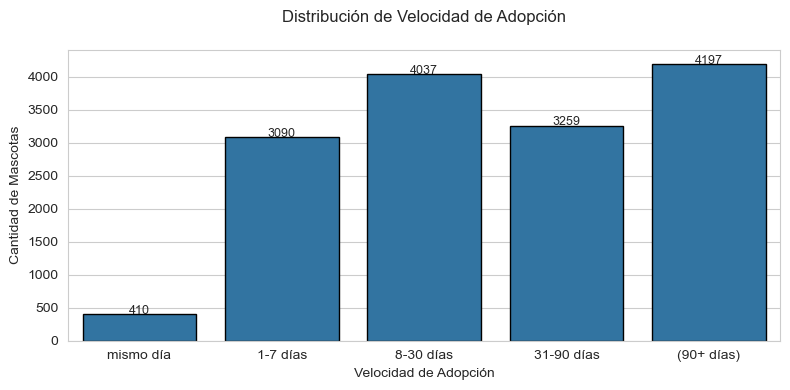

In [280]:
# Preparar datos
adoption_counts = df_expl['AdoptionSpeed'].value_counts().sort_index().reset_index()
adoption_counts.columns = ['AdoptionSpeed', 'count']


# Crear gr√°fico
plt.figure(figsize=(8, 4))
ax = sns.barplot(
    data=adoption_counts,
    x='AdoptionSpeed',
    y='count',
    #palette=colors,
    edgecolor='black'
)

# Etiquetas y t√≠tulo
plt.title('Distribuci√≥n de Velocidad de Adopci√≥n', pad=20)
plt.xlabel('Velocidad de Adopci√≥n')
plt.ylabel('Cantidad de Mascotas')

# Etiquetas sobre las barras
for i, row in adoption_counts.iterrows():
    ax.text(i, row['count'] + 2, row['count'], ha='center', fontsize=9)

plt.tight_layout()
plt.show()

In [281]:
df_expl.sample(2)

Type      Name  Age Breed1 Breed2  Gender Color1 Color2 Color3  \
200    Gatos      Baby    2    265      0   Macho      5      0      0   
1160  Perros  Freckles    3    307      0  Hembra      7      0      0   

     MaturitySize  ...     Health Quantity  Fee  State  \
200       Peque√±o  ...  Saludable        1  0.0  41327   
1160      Mediano  ...  Saludable        1  0.0  41326   

                             RescuerID  VideoAmt  \
200   550e496b62e645bffa3dd9c147ba264c         0   
1160  6177ae3a4951ab8c0fb21cb9cc739e80         0   

                                            Description      PetID PhotoAmt  \
200   I am posting on behalf of Bee Lian, my neighbo...  06296e4e2        6   
1160  Quite big for her age of 3 months. Super-intel...  5b56430cd        1   

      AdoptionSpeed  
200      (90+ d√≠as)  
1160     31-90 d√≠as  

[2 rows x 24 columns]

<Figure size 1200x600 with 0 Axes>

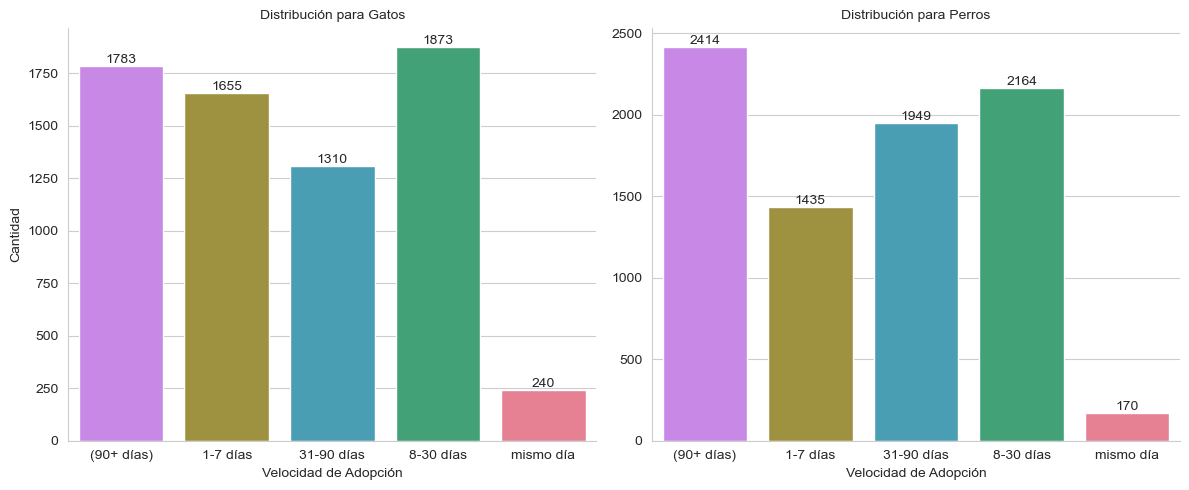

In [282]:
# Preparar los datos
plot_data = df_expl[df_expl['Type'].isin(['Perros', 'Gatos'])].copy()
#plot_data['Type'] = plot_data['Type'].map({1: 'Perros', 2: 'Gatos'})

# Configuraci√≥n
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Crear el gr√°fico
g = sns.FacetGrid(plot_data, col='Type', height=5, aspect=1.2, sharey=False)
g.map_dataframe(
    sns.countplot,
    x='AdoptionSpeed',
    hue='AdoptionSpeed',  # Soluciona el warning de palette
    palette='husl',
    order=sorted(plot_data['AdoptionSpeed'].unique()),
    legend=False  # Evita que muestre la leyenda de hue
)

# Configurar t√≠tulos y etiquetas
g.set_axis_labels('Velocidad de Adopci√≥n', 'Cantidad')
g.set_titles(col_template='Distribuci√≥n para {col_name}')  # Corrige el KeyError

# A√±adir los valores en las barras
for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container)

plt.tight_layout()
plt.show()

In [283]:
# Contar las ocurrencias de cada combinaci√≥n
conteo = df_expl.groupby(['AdoptionSpeed', 'Type']).size().reset_index(name='Conteo')

/var/folders/kp/s2gk9m_x0tbb3gq2tvx95dn40000gn/T/ipykernel_8395/2315931401.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo = df_expl.groupby(['AdoptionSpeed', 'Type']).size().reset_index(name='Conteo')


In [284]:
conteo

AdoptionSpeed    Type  Conteo
0     mismo d√≠a   Gatos     240
1     mismo d√≠a  Perros     170
2      1-7 d√≠as   Gatos    1655
3      1-7 d√≠as  Perros    1435
4     8-30 d√≠as   Gatos    1873
5     8-30 d√≠as  Perros    2164
6    31-90 d√≠as   Gatos    1310
7    31-90 d√≠as  Perros    1949
8    (90+ d√≠as)   Gatos    1783
9    (90+ d√≠as)  Perros    2414

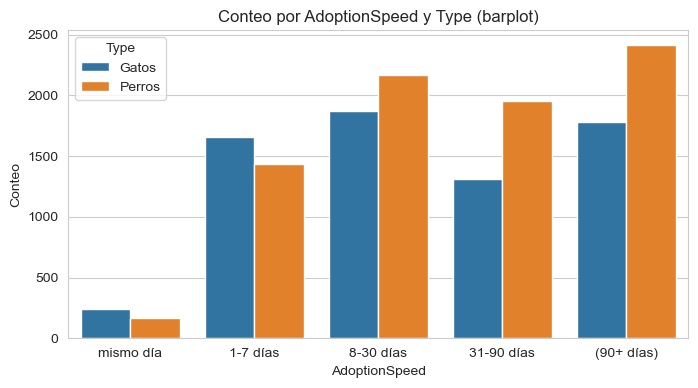

In [285]:
# M√©todo 2: Usando barplot con los datos pre-agrupados
plt.figure(figsize=(8, 4))
sns.barplot(x='AdoptionSpeed', y='Conteo', hue='Type', data=conteo)
plt.title('Conteo por AdoptionSpeed y Type (barplot)')
plt.xlabel('AdoptionSpeed')
plt.ylabel('Conteo')
plt.legend(title='Type')
plt.show()

In [286]:
df_expl['Type'].value_counts().to_frame('Cantidad').assign(Porcentaje=lambda x: x/x.sum()*100)

Cantidad  Porcentaje
Type                        
Perros      8132   54.238645
Gatos       6861   45.761355

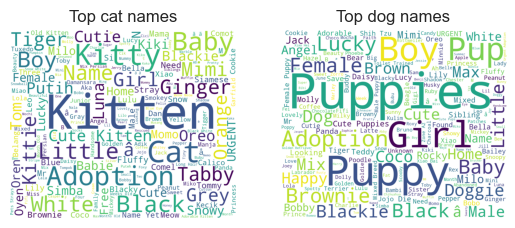

In [287]:
plt.subplot(1, 2, 1)
text_cat = ' '.join(df_expl.loc[df_expl['Type'] == 'Gatos', 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_cat)
plt.imshow(wordcloud)
plt.title('Top cat names')
plt.axis("off")

plt.subplot(1, 2, 2)
text_dog = ' '.join(df_expl.loc[df_expl['Type'] == 'Perros', 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_dog)
plt.imshow(wordcloud)
plt.title('Top dog names')
plt.axis("off")

plt.show()

In [288]:
df_expl

Type            Name  Age Breed1 Breed2  Gender Color1 Color2 Color3  \
0       Gatos          Nibble    3    299      0   Macho      1      7      0   
1       Gatos     No Name Yet    1    265      0   Macho      1      2      0   
2      Perros          Brisco    1    307      0   Macho      2      7      0   
3      Perros            Miko    4    307      0  Hembra      1      2      0   
4      Perros          Hunter    1    307      0   Macho      1      0      0   
...       ...             ...  ...    ...    ...     ...    ...    ...    ...   
14988   Gatos             NaN    2    266      0   Mixto      1      0      0   
14989   Gatos  Serato & Eddie   60    265    264   Mixto      1      4      7   
14990   Gatos         Monkies    2    265    266   Mixto      5      6      7   
14991   Gatos         Ms Daym    9    266      0  Hembra      4      7      0   
14992  Perros            Fili    1    307    307   Macho      2      0      0   

      MaturitySize  ...     Health Quantity    Fee  State  \
0          Peque√±o  ...  Saludable        1  100.0  41326   
1          Mediano  ...  Saludable        1    0.0  41401   
2          Mediano  ...  Saludable        1    0.0  41326   
3          Mediano  ...  Saludable        1  150.0  41401   
4          Mediano  ...  Saludable        1    0.0  41326   
...            ...  ...        ...      ...    ...    ...   
14988      Mediano  ...  Saludable        4    0.0  41326   
14989      Mediano  ...  Saludable        2    0.0  41326   
14990       Grande  ...  Saludable        5   30.0  41326   
14991      Peque√±o  ...  Saludable        1    0.0  41336   
14992      Mediano  ...  Saludable        1    0.0  41332   

                              RescuerID  VideoAmt  \
0      8480853f516546f6cf33aa88cd76c379         0   
1      3082c7125d8fb66f7dd4bff4192c8b14         0   
2      fa90fa5b1ee11c86938398b60abc32cb         0   
3      9238e4f44c71a75282e62f7136c6b240         0   
4      95481e953f8aed9ec3d16fc4509537e8         0   
...                                 ...       ...   
14988  61c84bd7bcb6fb31d2d480b1bcf9682e         0   
14989  1d5096c4a5e159a3b750c5cfcf6ceabf         0   
14990  6f40a7acfad5cc0bb3e44591ea446c05         0   
14991  c311c0c569245baa147d91fa4e351ae4         0   
14992  9ed1d5493d223eaa5024c1a031dbc9c2         0   

                                             Description      PetID PhotoAmt  \
0      Nibble is a 3+ month old ball of cuteness. He ...  86e1089a3        1   
1      I just found it alone yesterday near my apartm...  6296e909a        2   
2      Their pregnant mother was dumped by her irresp...  3422e4906        7   
3      Good guard dog, very alert, active, obedience ...  5842f1ff5        8   
4      This handsome yet cute boy is up for adoption....  850a43f90        3   
...                                                  ...        ...      ...   
14988  I have 4 kittens that need to be adopt urgentl...  dc0935a84        3   
14989  Serato(female cat- 3 color) is 4 years old and...  a01ab5b30        3   
14990  Mix breed, good temperament kittens. Love huma...  d981b6395        5   
14991  she is very shy..adventures and independent..s...  e4da1c9e4        3   
14992  Fili just loves laying around and also loves b...  a83d95ead        1   

       AdoptionSpeed  
0          8-30 d√≠as  
1          mismo d√≠a  
2         31-90 d√≠as  
3          8-30 d√≠as  
4          8-30 d√≠as  
...              ...  
14988      8-30 d√≠as  
14989     (90+ d√≠as)  
14990     31-90 d√≠as  
14991     (90+ d√≠as)  
14992     31-90 d√≠as  

[14993 rows x 24 columns]

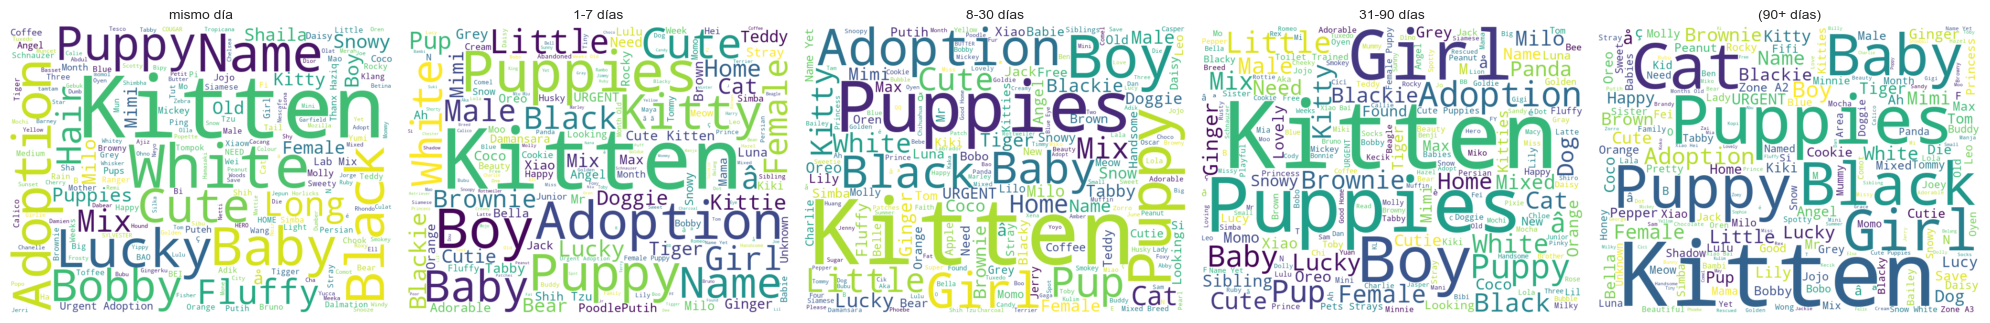

In [289]:
# Nos aseguramos de que est√© en texto legible y ordenado (categorical ordenado)
adoption_categories = df_expl['AdoptionSpeed'].cat.categories

# Configuramos el tama√±o del gr√°fico
fig, axes = plt.subplots(1, len(adoption_categories), figsize=(20, 6))

# Para cada categor√≠a de adopci√≥n
for i, adoption_label in enumerate(adoption_categories):
    text = ' '.join(
        df_expl.loc[df_expl['AdoptionSpeed'] == adoption_label, 'Name'].fillna('').astype(str)
    )
    wordcloud = WordCloud(max_font_size=None, background_color='white',
                          width=800, height=600).generate(text)
    
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis("off")
    axes[i].set_title(adoption_label, fontsize=10)

plt.tight_layout()
plt.show()

# Uniones con informacion relevante

In [290]:
df_expl

Type            Name  Age Breed1 Breed2  Gender Color1 Color2 Color3  \
0       Gatos          Nibble    3    299      0   Macho      1      7      0   
1       Gatos     No Name Yet    1    265      0   Macho      1      2      0   
2      Perros          Brisco    1    307      0   Macho      2      7      0   
3      Perros            Miko    4    307      0  Hembra      1      2      0   
4      Perros          Hunter    1    307      0   Macho      1      0      0   
...       ...             ...  ...    ...    ...     ...    ...    ...    ...   
14988   Gatos             NaN    2    266      0   Mixto      1      0      0   
14989   Gatos  Serato & Eddie   60    265    264   Mixto      1      4      7   
14990   Gatos         Monkies    2    265    266   Mixto      5      6      7   
14991   Gatos         Ms Daym    9    266      0  Hembra      4      7      0   
14992  Perros            Fili    1    307    307   Macho      2      0      0   

      MaturitySize  ...     Health Quantity    Fee  State  \
0          Peque√±o  ...  Saludable        1  100.0  41326   
1          Mediano  ...  Saludable        1    0.0  41401   
2          Mediano  ...  Saludable        1    0.0  41326   
3          Mediano  ...  Saludable        1  150.0  41401   
4          Mediano  ...  Saludable        1    0.0  41326   
...            ...  ...        ...      ...    ...    ...   
14988      Mediano  ...  Saludable        4    0.0  41326   
14989      Mediano  ...  Saludable        2    0.0  41326   
14990       Grande  ...  Saludable        5   30.0  41326   
14991      Peque√±o  ...  Saludable        1    0.0  41336   
14992      Mediano  ...  Saludable        1    0.0  41332   

                              RescuerID  VideoAmt  \
0      8480853f516546f6cf33aa88cd76c379         0   
1      3082c7125d8fb66f7dd4bff4192c8b14         0   
2      fa90fa5b1ee11c86938398b60abc32cb         0   
3      9238e4f44c71a75282e62f7136c6b240         0   
4      95481e953f8aed9ec3d16fc4509537e8         0   
...                                 ...       ...   
14988  61c84bd7bcb6fb31d2d480b1bcf9682e         0   
14989  1d5096c4a5e159a3b750c5cfcf6ceabf         0   
14990  6f40a7acfad5cc0bb3e44591ea446c05         0   
14991  c311c0c569245baa147d91fa4e351ae4         0   
14992  9ed1d5493d223eaa5024c1a031dbc9c2         0   

                                             Description      PetID PhotoAmt  \
0      Nibble is a 3+ month old ball of cuteness. He ...  86e1089a3        1   
1      I just found it alone yesterday near my apartm...  6296e909a        2   
2      Their pregnant mother was dumped by her irresp...  3422e4906        7   
3      Good guard dog, very alert, active, obedience ...  5842f1ff5        8   
4      This handsome yet cute boy is up for adoption....  850a43f90        3   
...                                                  ...        ...      ...   
14988  I have 4 kittens that need to be adopt urgentl...  dc0935a84        3   
14989  Serato(female cat- 3 color) is 4 years old and...  a01ab5b30        3   
14990  Mix breed, good temperament kittens. Love huma...  d981b6395        5   
14991  she is very shy..adventures and independent..s...  e4da1c9e4        3   
14992  Fili just loves laying around and also loves b...  a83d95ead        1   

       AdoptionSpeed  
0          8-30 d√≠as  
1          mismo d√≠a  
2         31-90 d√≠as  
3          8-30 d√≠as  
4          8-30 d√≠as  
...              ...  
14988      8-30 d√≠as  
14989     (90+ d√≠as)  
14990     31-90 d√≠as  
14991     (90+ d√≠as)  
14992     31-90 d√≠as  

[14993 rows x 24 columns]

In [291]:
breeds

BreedID  Type         BreedName
0         1     1     Affenpinscher
1         2     1      Afghan Hound
2         3     1  Airedale Terrier
3         4     1            Akbash
4         5     1             Akita
..      ...   ...               ...
302     302     2            Torbie
303     303     2     Tortoiseshell
304     304     2    Turkish Angora
305     305     2       Turkish Van
306     306     2            Tuxedo

[307 rows x 3 columns]

In [292]:
# Unificamos la informaci√≥n de razas (Breed1 y Breed2)
breeds = breeds.rename(columns={"BreedID": "Breed1"})

# Merge para Breed1
df_expl = pd.merge(df_expl, breeds[["Breed1", "BreedName"]], how="left", on="Breed1")
df_expl = df_expl.rename(columns={"BreedName": "BreedName_1"})

# Preparaci√≥n y merge para Breed2
breeds = breeds.rename(columns={"Breed1": "Breed2"})  # reutilizamos el DataFrame cambiando la columna
df_expl = pd.merge(df_expl, breeds[["Breed2", "BreedName"]], how="left", on="Breed2")
df_expl = df_expl.rename(columns={"BreedName": "BreedName_2"})


# Unificamos la informaci√≥n de colores (Color1, Color2, Color3)
colors = colors.rename(columns={"ColorID": "Color1"})

# Merge para Color1
df_expl = pd.merge(df_expl, colors[["Color1", "ColorName"]], how="left", on="Color1")
df_expl = df_expl.rename(columns={"ColorName": "ColorName_1"})

# Preparaci√≥n y merge para Color2
colors = colors.rename(columns={"Color1": "Color2"})
df_expl = pd.merge(df_expl, colors[["Color2", "ColorName"]], how="left", on="Color2")
df_expl = df_expl.rename(columns={"ColorName": "ColorName_2"})

# Preparaci√≥n y merge para Color3
colors = colors.rename(columns={"Color2": "Color3"})
df_expl = pd.merge(df_expl, colors[["Color3", "ColorName"]], how="left", on="Color3")
df_expl = df_expl.rename(columns={"ColorName": "ColorName_3"})


# Unificamos la informaci√≥n de estados
states = states.rename(columns={"StateID": "State"})
df_expl = pd.merge(df_expl, states[["State", "StateName"]], how="left", on="State")

# Visualizaci√≥n r√°pida del resultado
df_expl.head(4)


Type         Name  Age Breed1 Breed2  Gender Color1 Color2 Color3  \
0   Gatos       Nibble    3    299      0   Macho      1      7      0   
1   Gatos  No Name Yet    1    265      0   Macho      1      2      0   
2  Perros       Brisco    1    307      0   Macho      2      7      0   
3  Perros         Miko    4    307      0  Hembra      1      2      0   

  MaturitySize  ...                                        Description  \
0      Peque√±o  ...  Nibble is a 3+ month old ball of cuteness. He ...   
1      Mediano  ...  I just found it alone yesterday near my apartm...   
2      Mediano  ...  Their pregnant mother was dumped by her irresp...   
3      Mediano  ...  Good guard dog, very alert, active, obedience ...   

       PetID PhotoAmt AdoptionSpeed           BreedName_1  BreedName_2  \
0  86e1089a3        1     8-30 d√≠as                 Tabby          NaN   
1  6296e909a        2     mismo d√≠a  Domestic Medium Hair          NaN   
2  3422e4906        7    31-90 d√≠as           Mixed Breed          NaN   
3  5842f1ff5        8     8-30 d√≠as           Mixed Breed          NaN   

   ColorName_1 ColorName_2 ColorName_3     StateName  
0        Black       White         NaN      Selangor  
1        Black       Brown         NaN  Kuala Lumpur  
2        Brown       White         NaN      Selangor  
3        Black       Brown         NaN  Kuala Lumpur  

[4 rows x 30 columns]

In [293]:
df_expl.sample(5).T

11318  \
Type                                                       Gatos   
Name                                                     Boi Boi   
Age                                                           24   
Breed1                                                       295   
Breed2                                                         0   
Gender                                                     Macho   
Color1                                                         3   
Color2                                                         0   
Color3                                                         0   
MaturitySize                                             Mediano   
FurLength                                                  Medio   
Vaccinated                                                    S√≠   
Dewormed                                                      S√≠   
Sterilized                                                    No   
Health                                                 Saludable   
Quantity                                                       1   
Fee                                                          0.0   
State                                                      41401   
RescuerID                       aebc207710fcea5f612af6147a0f1b98   
VideoAmt                                                       0   
Description    Hi guys, i very sad but i have to let my cat f...   
PetID                                                  d5262ce2b   
PhotoAmt                                                       4   
AdoptionSpeed                                         (90+ d√≠as)   
BreedName_1                                            Singapura   
BreedName_2                                                  NaN   
ColorName_1                                               Golden   
ColorName_2                                                  NaN   
ColorName_3                                                  NaN   
StateName                                           Kuala Lumpur   

                                          8670   \
Type                                      Gatos   
Name                                      Tonny   
Age                                           5   
Breed1                                      266   
Breed2                                        0   
Gender                                    Macho   
Color1                                        1   
Color2                                        2   
Color3                                        0   
MaturitySize                             Grande   
FurLength                                 Largo   
Vaccinated                                   No   
Dewormed                                     No   
Sterilized                                   No   
Health                                Saludable   
Quantity                                      1   
Fee                                        50.0   
State                                     41326   
RescuerID      28e30da41b4db9c4c875362febc27f7d   
VideoAmt                                      0   
Description                        so energetic   
PetID                                 c72bd65dc   
PhotoAmt                                      6   
AdoptionSpeed                        (90+ d√≠as)   
BreedName_1                 Domestic Short Hair   
BreedName_2                                 NaN   
ColorName_1                               Black   
ColorName_2                               Brown   
ColorName_3                                 NaN   
StateName                              Selangor   

                                                           11772  \
Type                                                       Gatos   
Name                                                        Snow   
Age                                                            2   
Breed1                                                       265   
Breed2                  

In [294]:
df_expl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Type           14993 non-null  object  
 1   Name           13728 non-null  object  
 2   Age            14993 non-null  int8    
 3   Breed1         14993 non-null  object  
 4   Breed2         14993 non-null  object  
 5   Gender         14993 non-null  object  
 6   Color1         14993 non-null  category
 7   Color2         14993 non-null  object  
 8   Color3         14993 non-null  object  
 9   MaturitySize   14993 non-null  object  
 10  FurLength      14993 non-null  object  
 11  Vaccinated     14993 non-null  object  
 12  Dewormed       14993 non-null  object  
 13  Sterilized     14993 non-null  object  
 14  Health         14993 non-null  object  
 15  Quantity       14993 non-null  uint16  
 16  Fee            14993 non-null  float64 
 17  State          14993 non-null  

In [313]:
def plot_categorical_distribution_prop(dfs, column, target='AdoptionSpeed'):
    plt.figure(figsize=(8, 4))
    
    # Agrupar y calcular proporciones por categor√≠a
    grouped = dfs.groupby([column, target]).size().reset_index(name='count')
    total_per_cat = grouped.groupby(column)['count'].transform('sum')
    grouped['Proportion'] = grouped['count'] / total_per_cat

    sns.barplot(data=grouped, x=column, y='Proportion', hue=target)
    plt.title(f'{column} vs {target}')
    plt.ylabel('Proporci√≥n por categor√≠a')
    plt.legend(title=target)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [315]:
def plot_categorical_distribution_tot(dfs, column, target='AdoptionSpeed'):
    plt.figure(figsize=(8, 4))
    
    # Agrupar y calcular proporciones por categor√≠a
    grouped = dfs.groupby([column, target]).size().reset_index(name='count')
    #total_per_cat = grouped.groupby(column)['count'].transform('sum')
    #grouped['Proportion'] = grouped['count'] / total_per_cat

    sns.barplot(data=grouped, x=column, y='count', hue=target)
    plt.title(f'{column} vs {target}')
    plt.ylabel('Total por categor√≠a')
    plt.legend(title=target)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [299]:
# Aplicar a variables categ√≥ricas principales
categorical_cols = [
    "Gender", "Vaccinated", "Dewormed", "Sterilized",
    "Health", "FurLength", 'MaturitySize'
]

/var/folders/kp/s2gk9m_x0tbb3gq2tvx95dn40000gn/T/ipykernel_8395/109083217.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dfs.groupby([column, target]).size().reset_index(name='count')


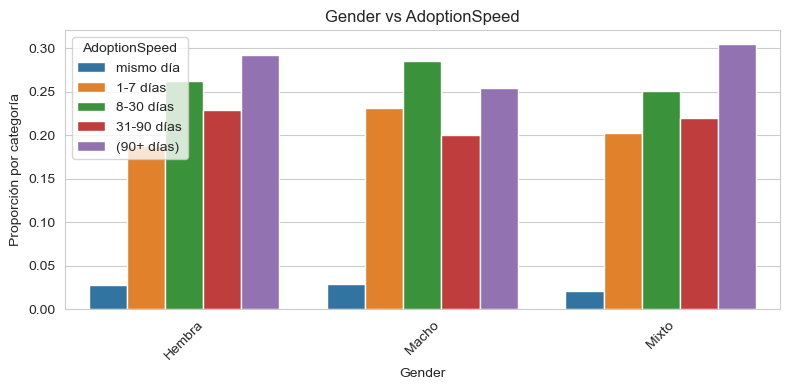

/var/folders/kp/s2gk9m_x0tbb3gq2tvx95dn40000gn/T/ipykernel_8395/109083217.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dfs.groupby([column, target]).size().reset_index(name='count')


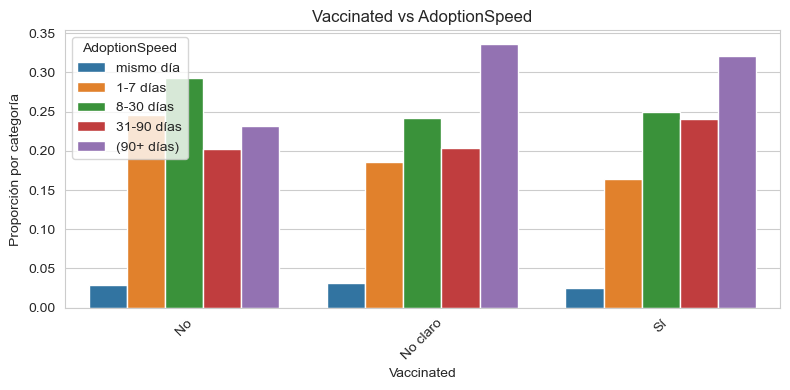

/var/folders/kp/s2gk9m_x0tbb3gq2tvx95dn40000gn/T/ipykernel_8395/109083217.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dfs.groupby([column, target]).size().reset_index(name='count')


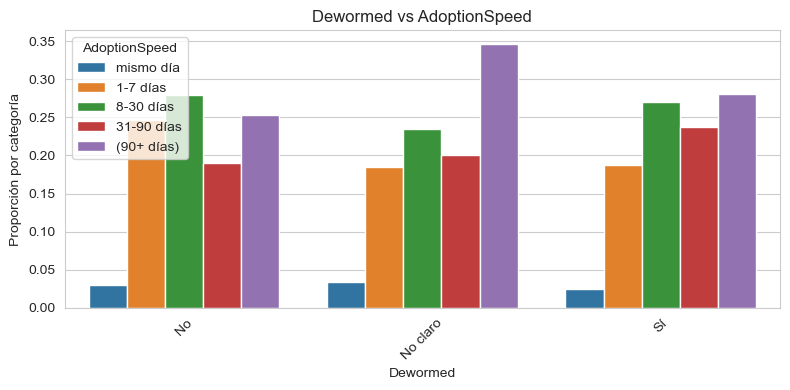

/var/folders/kp/s2gk9m_x0tbb3gq2tvx95dn40000gn/T/ipykernel_8395/109083217.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dfs.groupby([column, target]).size().reset_index(name='count')


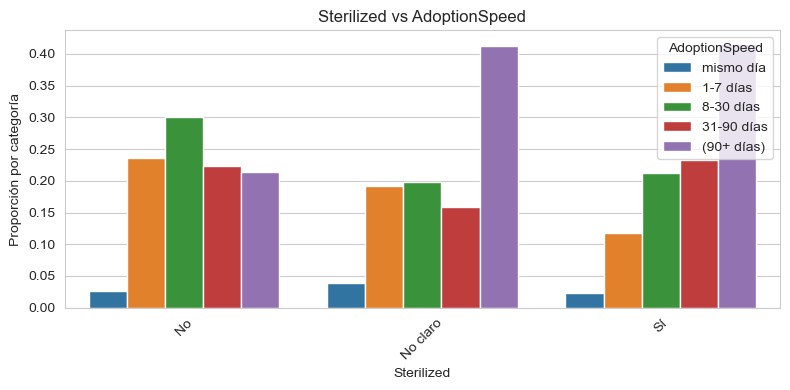

/var/folders/kp/s2gk9m_x0tbb3gq2tvx95dn40000gn/T/ipykernel_8395/109083217.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dfs.groupby([column, target]).size().reset_index(name='count')


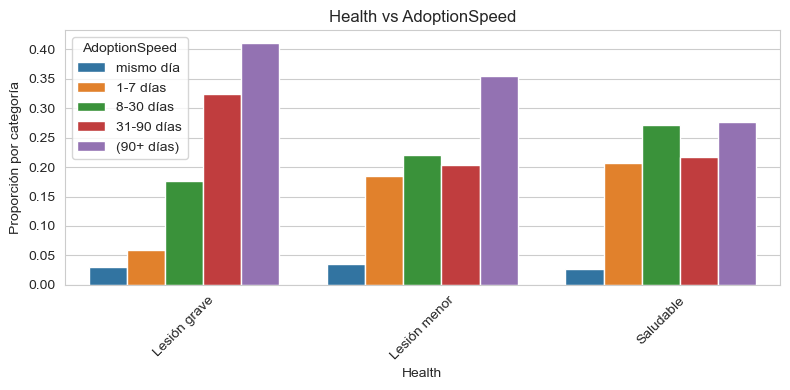

/var/folders/kp/s2gk9m_x0tbb3gq2tvx95dn40000gn/T/ipykernel_8395/109083217.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dfs.groupby([column, target]).size().reset_index(name='count')


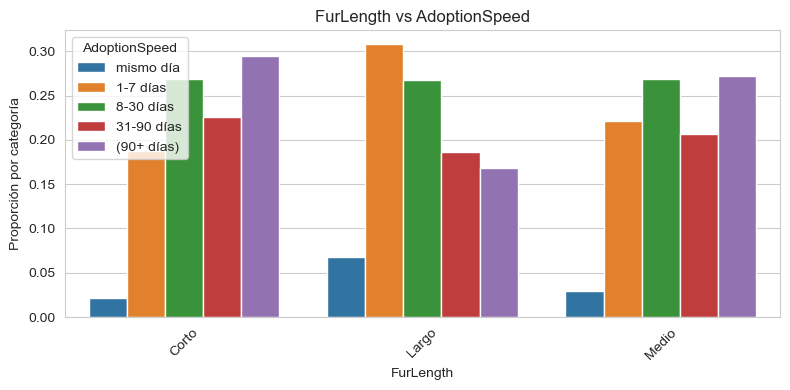

/var/folders/kp/s2gk9m_x0tbb3gq2tvx95dn40000gn/T/ipykernel_8395/109083217.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dfs.groupby([column, target]).size().reset_index(name='count')


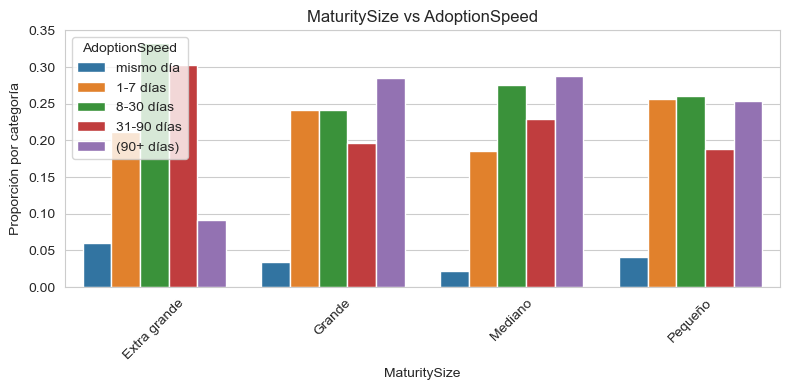

In [314]:
for col in categorical_cols:
    plot_categorical_distribution_prop(df_expl, col)

/var/folders/kp/s2gk9m_x0tbb3gq2tvx95dn40000gn/T/ipykernel_8395/2873578259.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dfs.groupby([column, target]).size().reset_index(name='count')


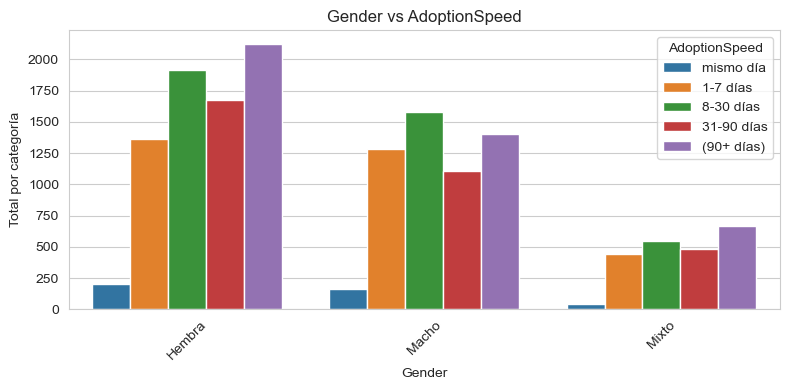

/var/folders/kp/s2gk9m_x0tbb3gq2tvx95dn40000gn/T/ipykernel_8395/2873578259.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dfs.groupby([column, target]).size().reset_index(name='count')


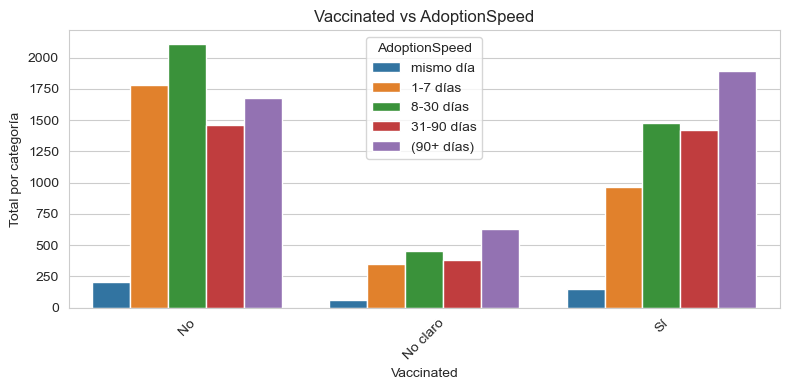

/var/folders/kp/s2gk9m_x0tbb3gq2tvx95dn40000gn/T/ipykernel_8395/2873578259.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dfs.groupby([column, target]).size().reset_index(name='count')


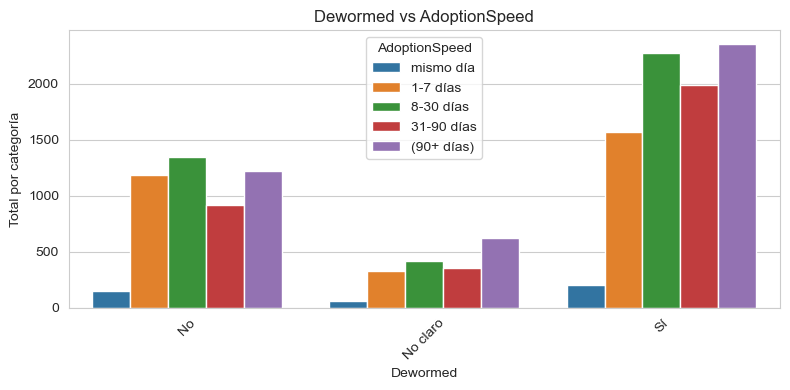

/var/folders/kp/s2gk9m_x0tbb3gq2tvx95dn40000gn/T/ipykernel_8395/2873578259.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dfs.groupby([column, target]).size().reset_index(name='count')


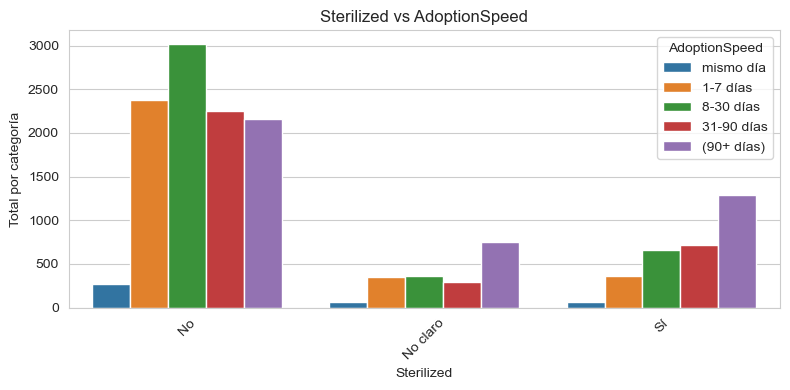

/var/folders/kp/s2gk9m_x0tbb3gq2tvx95dn40000gn/T/ipykernel_8395/2873578259.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dfs.groupby([column, target]).size().reset_index(name='count')


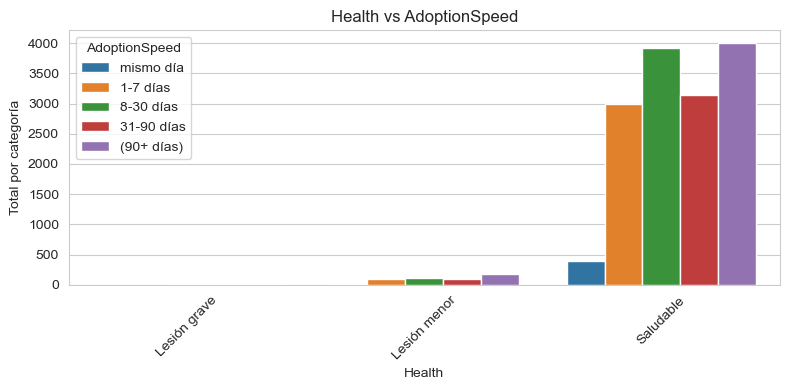

/var/folders/kp/s2gk9m_x0tbb3gq2tvx95dn40000gn/T/ipykernel_8395/2873578259.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dfs.groupby([column, target]).size().reset_index(name='count')


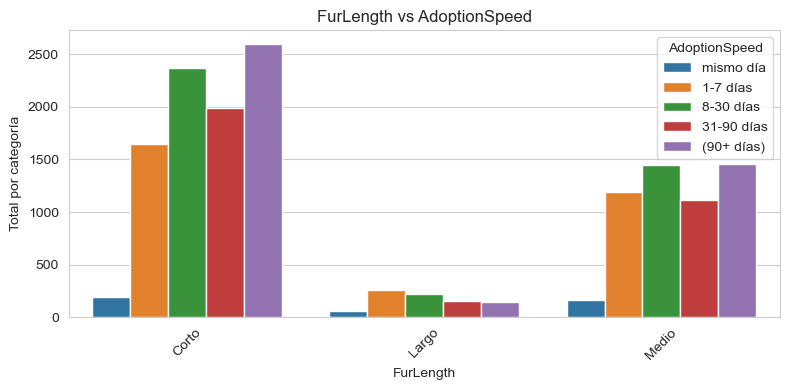

/var/folders/kp/s2gk9m_x0tbb3gq2tvx95dn40000gn/T/ipykernel_8395/2873578259.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dfs.groupby([column, target]).size().reset_index(name='count')


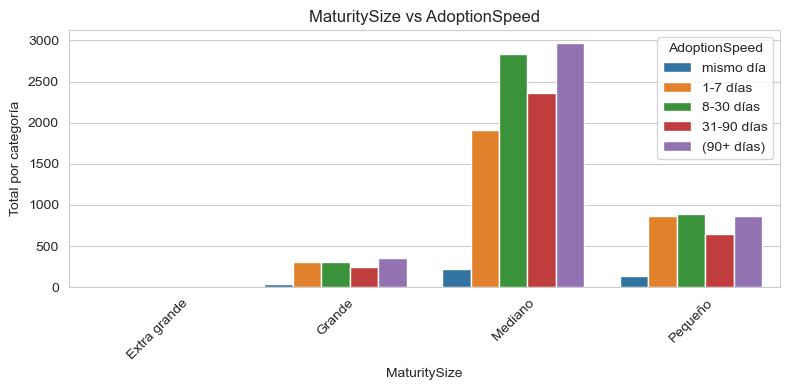

In [316]:
for col in categorical_cols:
    plot_categorical_distribution_tot(df_expl, col)

## Columnas numericas

In [319]:
def plot_numeric_boxplot(df, column, target='AdoptionSpeed'):
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, y=target, x=column)
    plt.title(f'{column} distribuido por {target}')
    plt.tight_layout()
    plt.show()

numeric_cols = ["Age", "Fee", "Quantity", "PhotoAmt", "VideoAmt"]

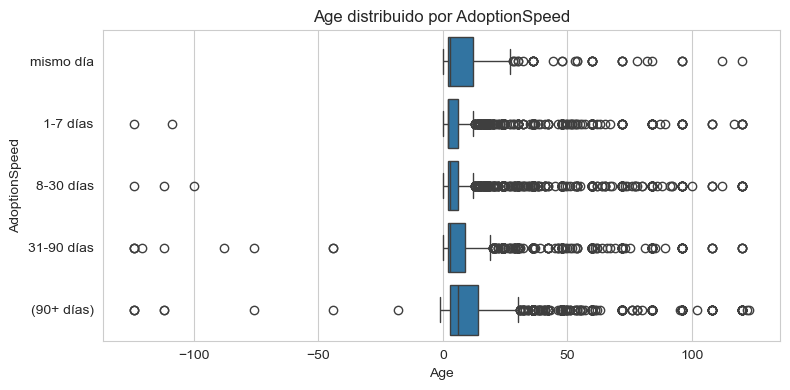

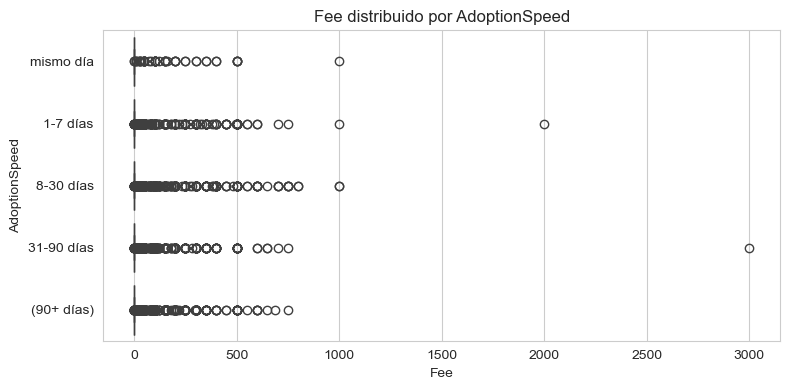

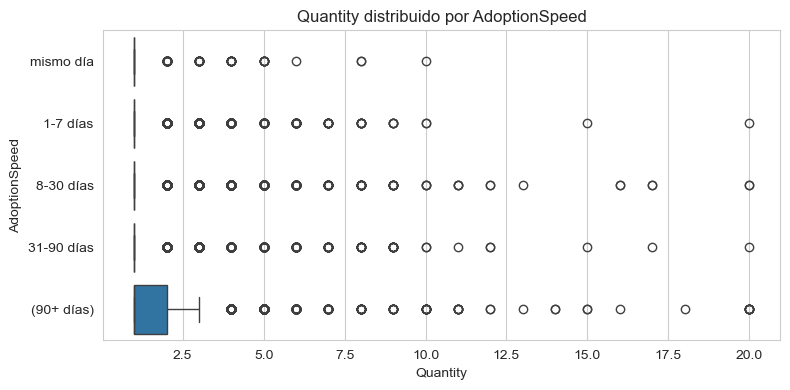

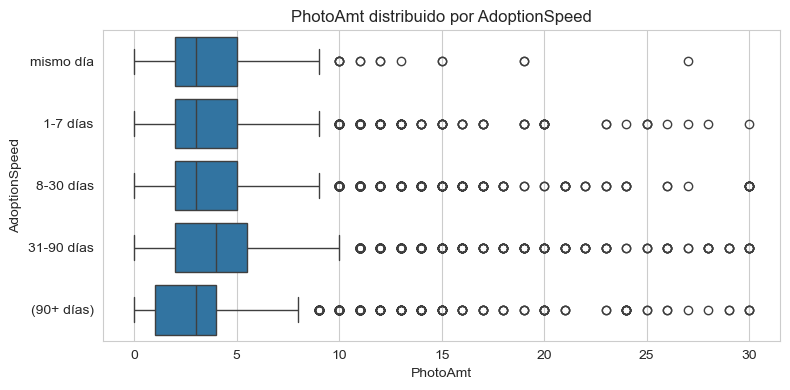

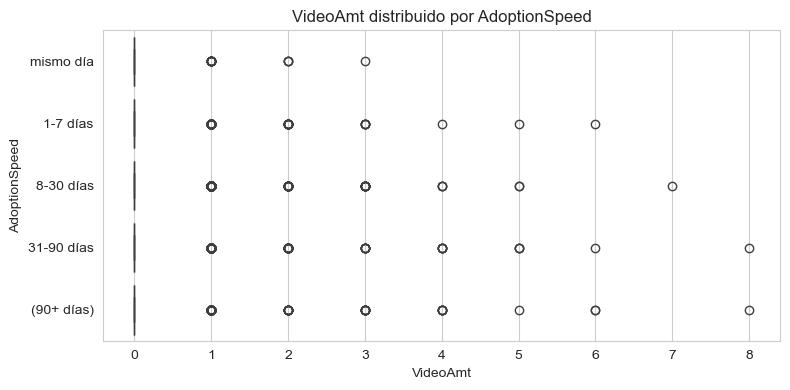

In [320]:
for col in numeric_cols:
    plot_numeric_boxplot(df_expl, col)

In [323]:
def plot_numeric_boxplot_out(df, column, target='AdoptionSpeed', std_range=3):
    """
    Grafica un boxplot para una variable num√©rica contra la variable target,
    limitando los valores a ¬± std_range desviaciones est√°ndar de la media.
    """
    mean = df[column].mean()
    std = df[column].std()
    
    lower = mean - std_range * std
    upper = mean + std_range * std

    # Filtrar valores fuera del rango
    filtered_df = df[(df[column] >= lower) & (df[column] <= upper)]

    plt.figure(figsize=(8, 4))
    sns.boxplot(data=filtered_df, y=target, x=column)
    plt.title(f'{column} distribuido por {target}\n(Rango ¬±{std_range}œÉ)')
    plt.tight_layout()
    plt.show()

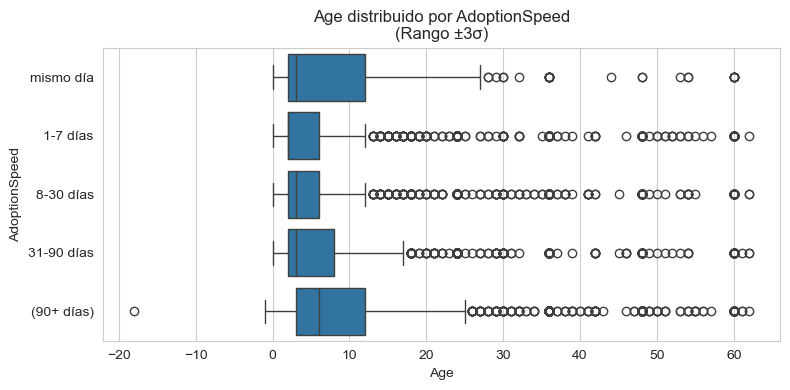

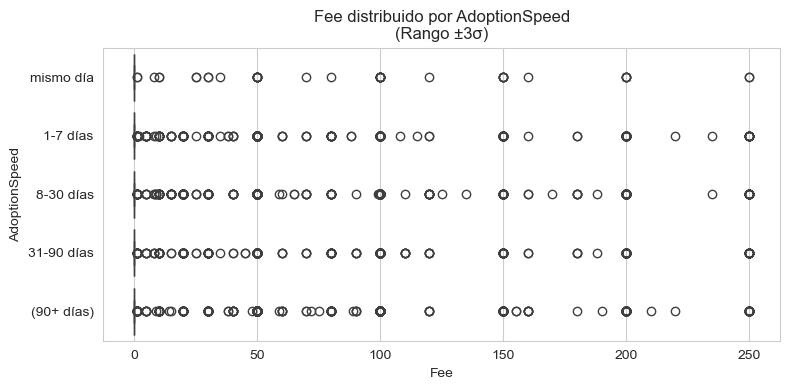

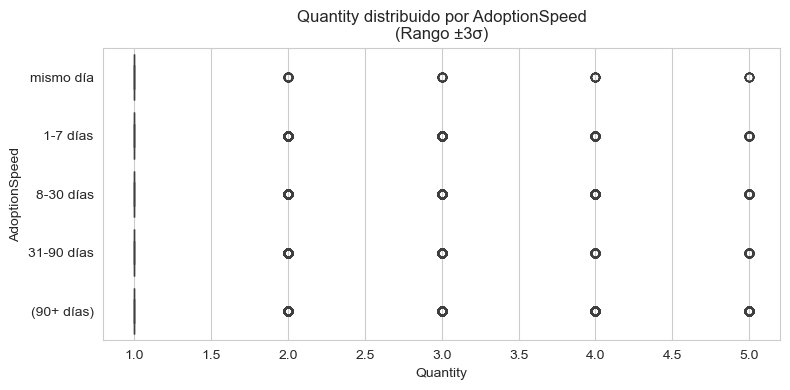

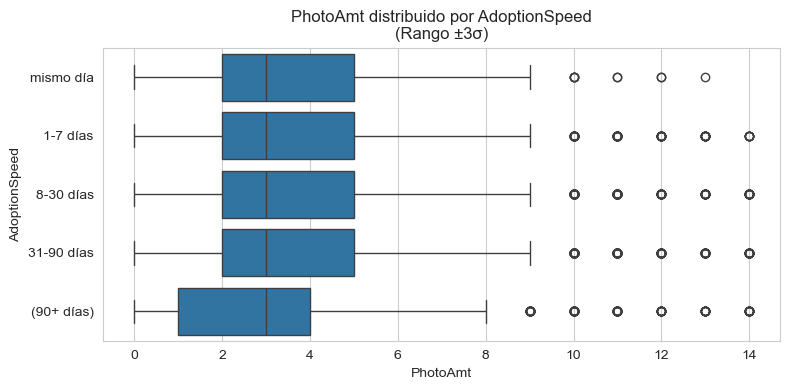

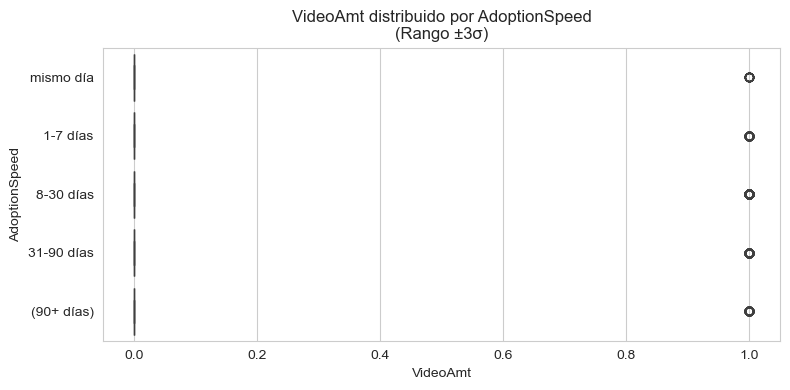

In [327]:
for col in numeric_cols:
    plot_numeric_boxplot_out(df_expl, col, std_range=3)  # 3 sigma es com√∫n

In [328]:
def plot_kde_by_adoption(df, column, target='AdoptionSpeed'):
    plt.figure(figsize=(10, 5))
    for speed in sorted(df[target].unique()):
        sns.kdeplot(df[df[target]==speed][column], label=f'AdoptionSpeed {speed}', fill=True)
    plt.title(f'Distribuci√≥n KDE de {column} seg√∫n {target}')
    plt.legend()
    plt.tight_layout()
    plt.show()

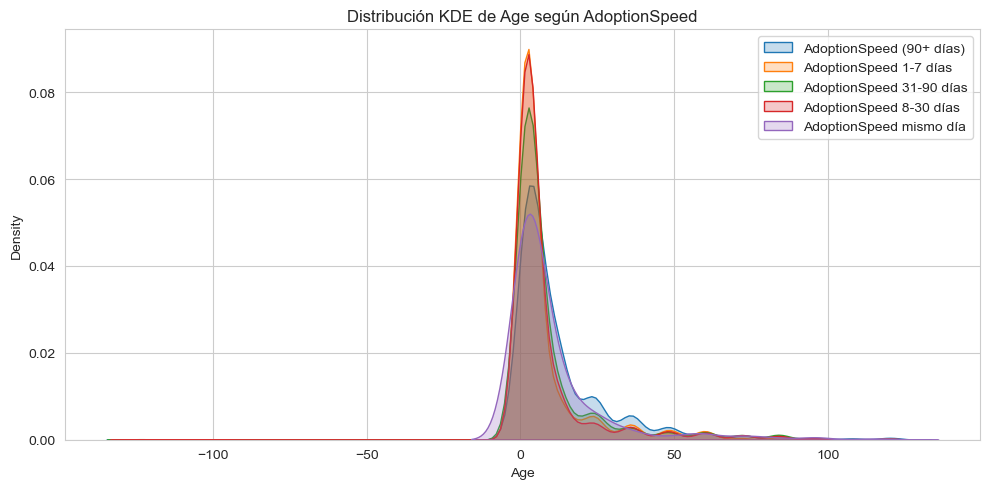

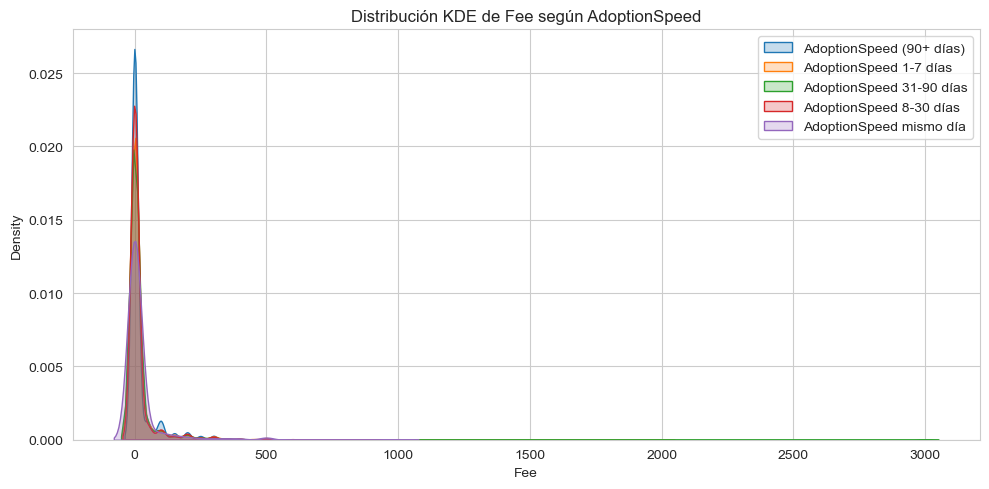

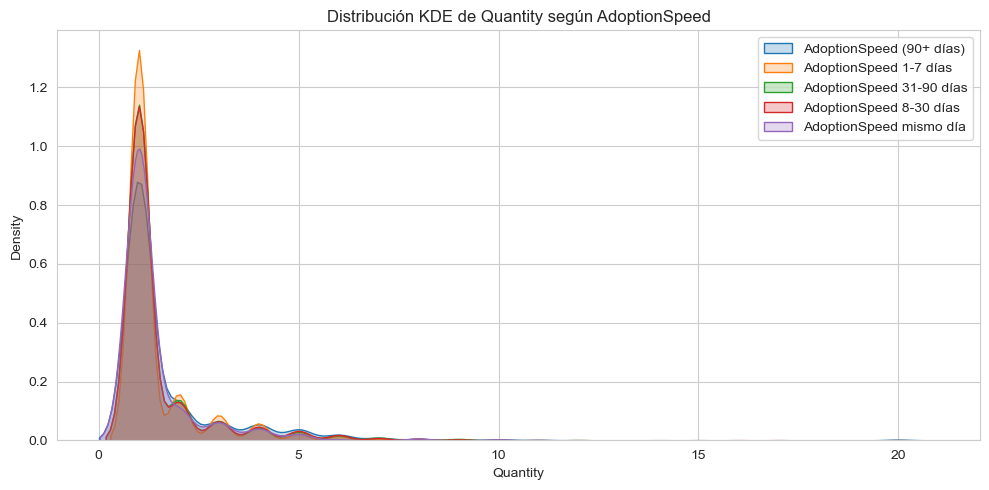

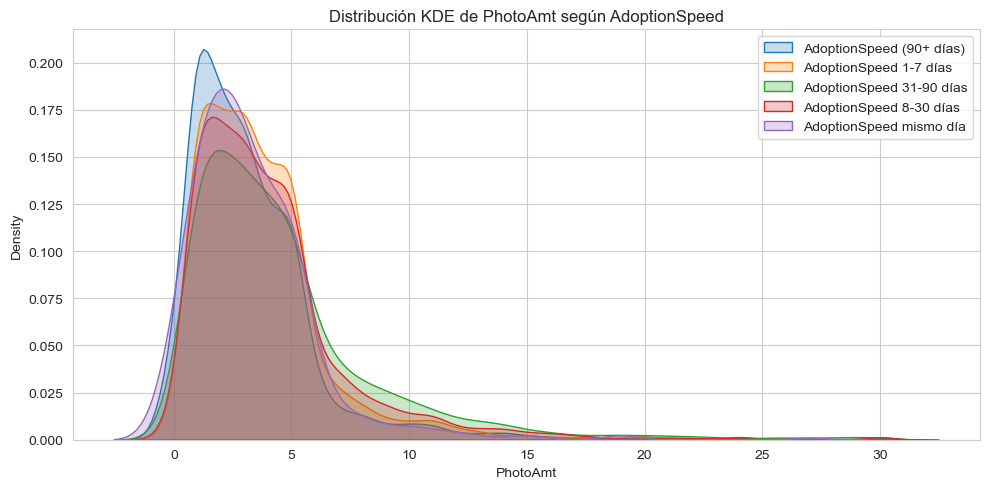

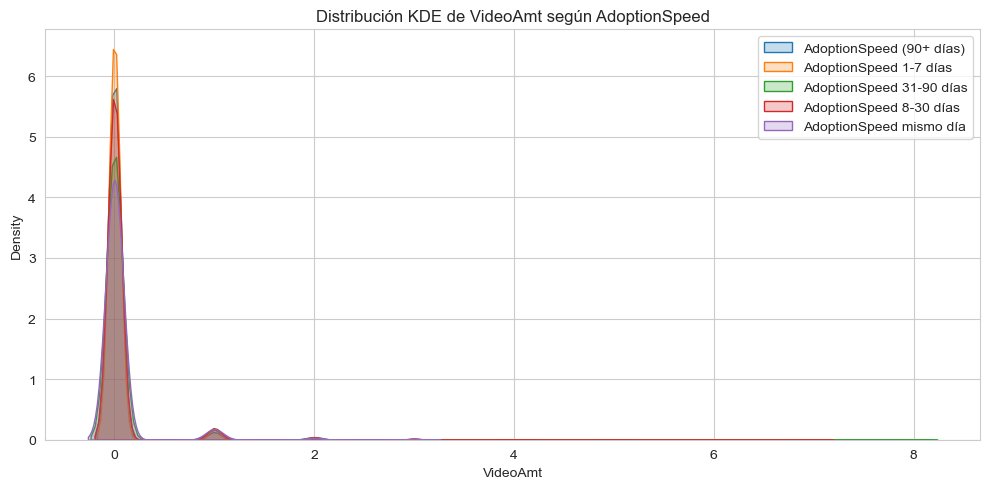

In [329]:

for col in numeric_cols:
    plot_kde_by_adoption(df_expl, col)


In [333]:
def top_k_cats_plot(df, column, k=10, target='AdoptionSpeed'):
    top_k = df[column].value_counts().head(k).index
    filtered_df = df[df[column].isin(top_k)]
    plot_categorical_distribution(filtered_df, column)

/var/folders/kp/s2gk9m_x0tbb3gq2tvx95dn40000gn/T/ipykernel_8395/3965131357.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dfs.groupby([column, target]).size().reset_index(name='count')


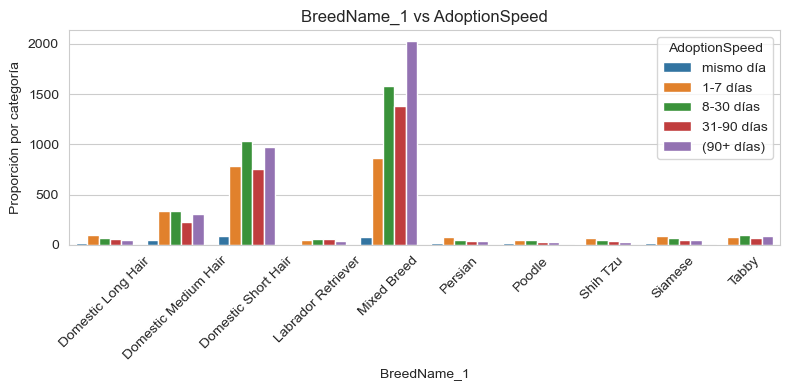

/var/folders/kp/s2gk9m_x0tbb3gq2tvx95dn40000gn/T/ipykernel_8395/3965131357.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dfs.groupby([column, target]).size().reset_index(name='count')


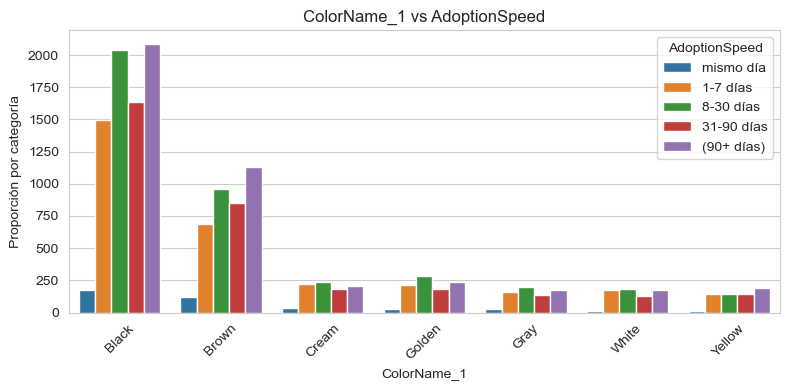

/var/folders/kp/s2gk9m_x0tbb3gq2tvx95dn40000gn/T/ipykernel_8395/3965131357.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dfs.groupby([column, target]).size().reset_index(name='count')


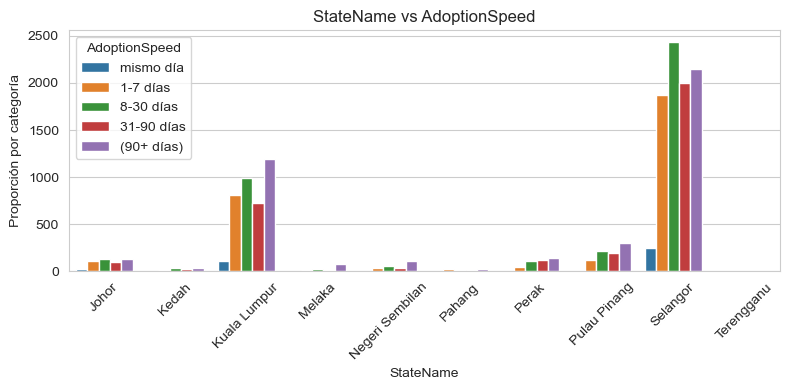

In [334]:
top_k_cats_plot(df_expl, "BreedName_1")
top_k_cats_plot(df_expl, "ColorName_1")
top_k_cats_plot(df_expl, "StateName")

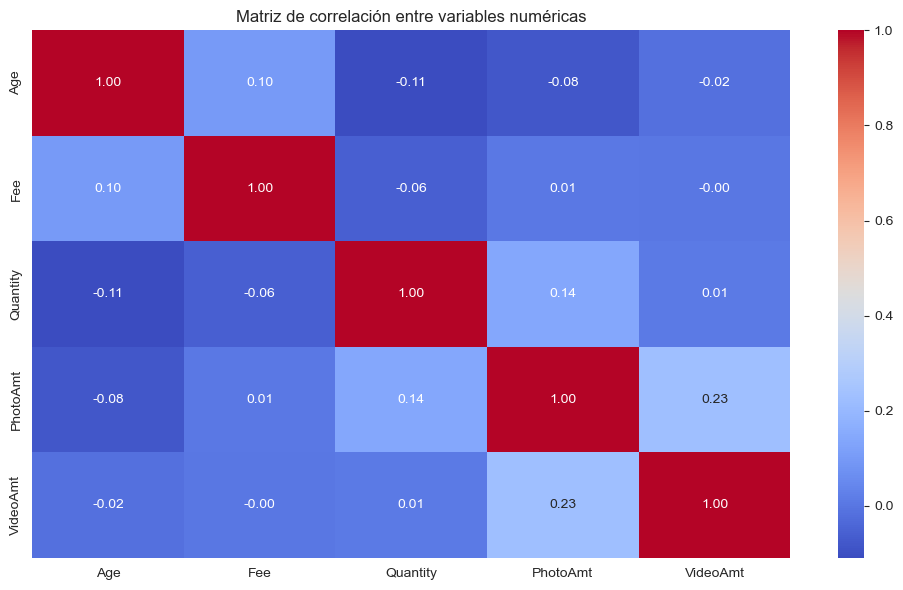

In [336]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_expl[numeric_cols ].corr(), 
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlaci√≥n entre variables num√©ricas")
plt.tight_layout()
plt.show()

## Analisis de correspondencia

In [341]:
cat_cols = [
    'Type', 'Gender', 'MaturitySize', 'FurLength', 
    'Vaccinated', 'Dewormed', 'Sterilized', 'Health'
]


In [339]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

In [342]:
def correspondencia_simple(df, var_cat, target='AdoptionSpeed', n_components=2, plot=True):
    """
    Realiza An√°lisis de Correspondencias (CA) entre una variable categ√≥rica y la target.
    Retorna los coordenadas de las categor√≠as y muestra gr√°fico si se desea.
    """
    # 1. Tabla de contingencia
    contingency = pd.crosstab(df[var_cat], df[target])

    # 2. Normalizaci√≥n (perfil de filas)
    Z = contingency / contingency.sum().sum()

    # 3. An√°lisis de correspondencias usando SVD
    svd = TruncatedSVD(n_components=n_components)
    coords = svd.fit_transform(Z)

    coords_df = pd.DataFrame(coords, index=contingency.index, columns=[f"Dim{i+1}" for i in range(n_components)])

    # 4. Visualizaci√≥n
    if plot:
        plt.figure(figsize=(6, 5))
        plt.scatter(coords_df["Dim1"], coords_df["Dim2"])
        for i, label in enumerate(coords_df.index):
            plt.text(coords_df.iloc[i, 0], coords_df.iloc[i, 1], label, fontsize=9)
        plt.title(f"An√°lisis de Correspondencias: {var_cat}")
        plt.xlabel("Dim 1")
        plt.ylabel("Dim 2")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return coords_df

üîç Analizando Type...


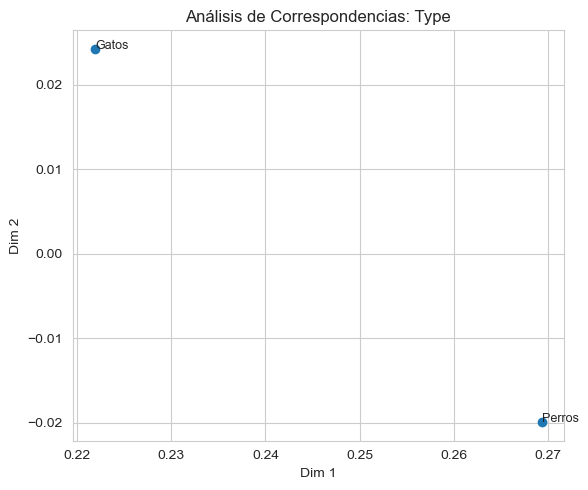

üîç Analizando Gender...


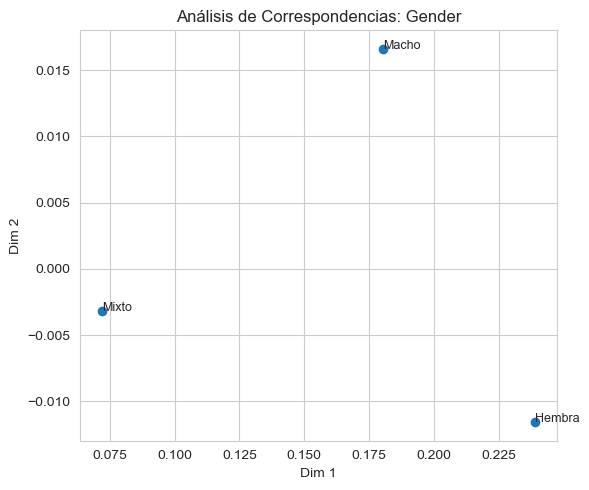

üîç Analizando MaturitySize...


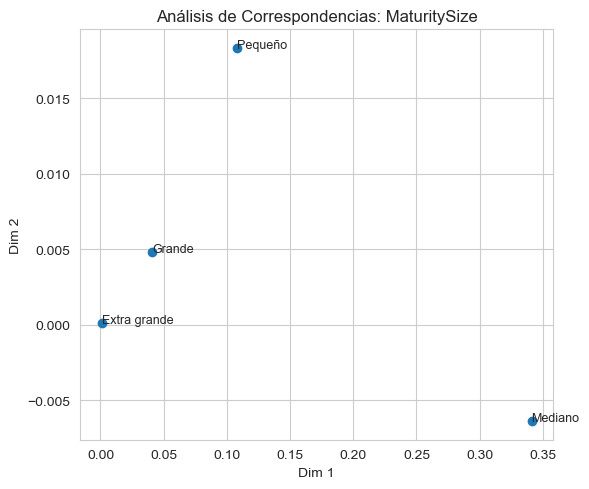

üîç Analizando FurLength...


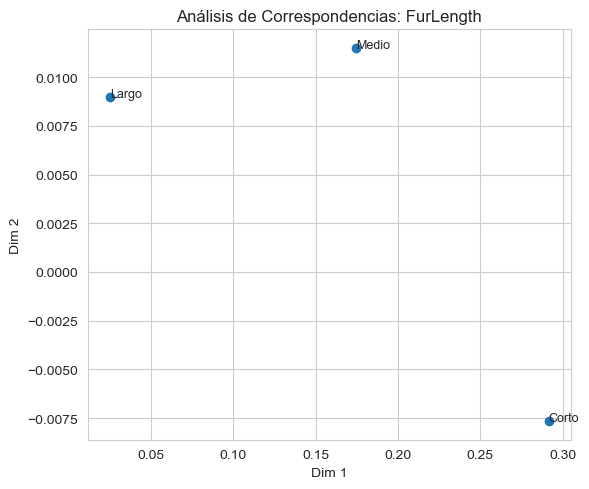

üîç Analizando Vaccinated...


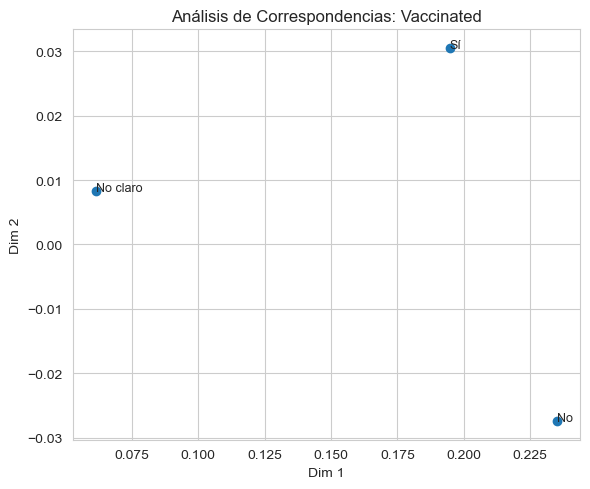

üîç Analizando Dewormed...


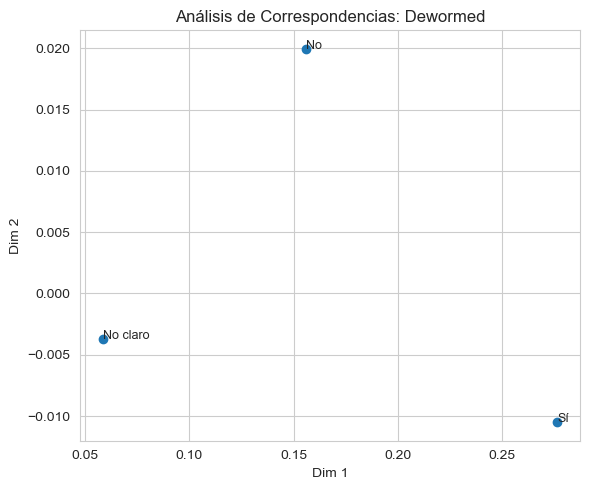

üîç Analizando Sterilized...


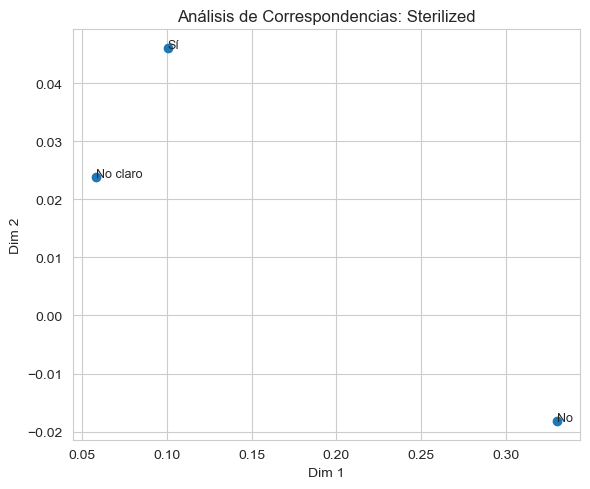

üîç Analizando Health...


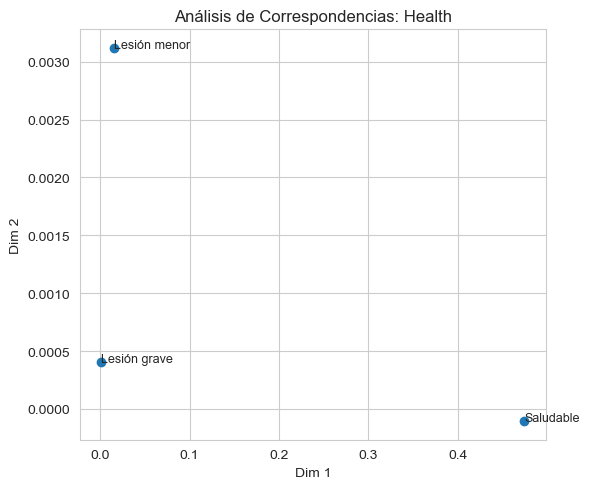

In [343]:
resultados_ca = {}

for col in cat_cols:
    print(f"üîç Analizando {col}...")
    coords = correspondencia_simple(df_expl, col)
    resultados_ca[col] = coords

## Correspondencia Multiple

In [349]:
#!pip install prince

  Using cached scikit_learn-1.6.1-cp39-cp39-macosx_10_9_x86_64.whl.metadata (31 kB)
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 731.2/731.2 kB 9.6 MB/s eta 0:00:00
Using cached scikit_learn-1.6.1-cp39-cp39-macosx_10_9_x86_64.whl (12.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [350]:
import prince


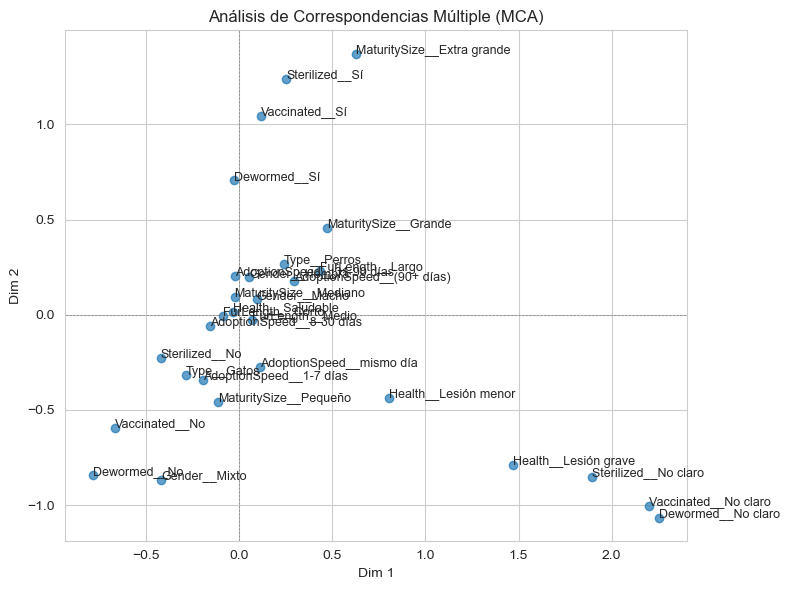

In [356]:
# Variables categ√≥ricas
cat_cols = [
    'Type', 'Gender', 'MaturitySize', 'FurLength',
    'Vaccinated', 'Dewormed', 'Sterilized', 'Health',
    'AdoptionSpeed'
]

# Subset y aseguramos que todas sean categ√≥ricas
df_mca = df_expl[cat_cols].copy()
for col in df_mca.columns:
    df_mca[col] = df_mca[col].astype('category')

# Crear y ajustar modelo MCA
mca = prince.MCA(
    n_components=2,
    n_iter=5,
    copy=True,
    check_input=True,
    engine='sklearn',  # <-- CORREGIDO
    random_state=42
)

mca = mca.fit(df_mca)

# Coordenadas de las categor√≠as
coords = mca.column_coordinates(df_mca)

# Visualizaci√≥n
plt.figure(figsize=(8, 6))
plt.scatter(coords[0], coords[1], alpha=0.7)

for i, label in enumerate(coords.index):
    plt.text(coords.iloc[i, 0], coords.iloc[i, 1], label, fontsize=9)

plt.title('An√°lisis de Correspondencias M√∫ltiple (MCA)')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.tight_layout()
plt.show()